In [1]:
import pandas as pd

df = pd.read_csv('/Users/inyong/Downloads/Auto.csv')

In [2]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
# check null
print(df.isnull().sum().sum())

0


In [4]:
# While most of the values in 'horsepower' appear to be integers, its actual type is set as 'object'.
print(df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object


In [5]:
#Upon checking for non-integer values, I found entries containing '?'.
non_numeric_rows = df[df['horsepower'].astype(str).apply(lambda x: not x.isnumeric())]

print(non_numeric_rows)

      mpg  cylinders  displacement horsepower  weight  acceleration  year  \
32   25.0          4          98.0          ?    2046          19.0    71   
126  21.0          6         200.0          ?    2875          17.0    74   
330  40.9          4          85.0          ?    1835          17.3    80   
336  23.6          4         140.0          ?    2905          14.3    80   
354  34.5          4         100.0          ?    2320          15.8    81   

     origin                  name  
32        1            ford pinto  
126       1         ford maverick  
330       2  renault lecar deluxe  
336       1    ford mustang cobra  
354       2           renault 18i  


In [6]:
# remove rows included ? value 

df = df[df['horsepower'] != '?']

In [7]:
# select column that datatype is 'object'
object_columns = df.select_dtypes('object').columns

for column in object_columns:
    try:
        # try to convert the column to float
        df[column] = df[column].astype(int)
    except ValueError:
        try:
            # if float conversion fails, try integer conversion
            df[column] = df[column].astype(float)
        except ValueError:
            # if both float and int conversion fail, and maintain column's type object
            pass

print(df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object


/var/folders/2z/2ccfrxv17rsbfpk7btjf9s2c0000gn/T/ipykernel_16113/1052423200.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(int)


In [8]:
# If all values in a column are of type float64 or int64, 
#then classify it as quantitative. Otherwise, categorize it as qualitative.

quantitative = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
qualitative = df.select_dtypes(exclude=['float64', 'int64']).columns.tolist()

In [11]:
#HW-5 (a)

print(quantitative)
print(qualitative)

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']
['name']


In [12]:
#HW-5 (b)
min_values = df[quantitative].apply(lambda x: x.min())
print(min_values)

mpg                9.0
cylinders          3.0
displacement      68.0
horsepower        46.0
weight          1613.0
acceleration       8.0
year              70.0
origin             1.0
dtype: float64


In [13]:
#HW-5 (b)
max_values = df[quantitative].apply(lambda x: x.max())
print(max_values)

mpg               46.6
cylinders          8.0
displacement     455.0
horsepower       230.0
weight          5140.0
acceleration      24.8
year              82.0
origin             3.0
dtype: float64


In [14]:
#HW-5 (c)
means = df[quantitative].mean()
print(means)

mpg               23.445918
cylinders          5.471939
displacement     194.411990
horsepower       104.469388
weight          2977.584184
acceleration      15.541327
year              75.979592
origin             1.576531
dtype: float64


In [15]:
#HW-5 (c)
std_devs = df[quantitative].std()
print(std_devs)

mpg               7.805007
cylinders         1.705783
displacement    104.644004
horsepower       38.491160
weight          849.402560
acceleration      2.758864
year              3.683737
origin            0.805518
dtype: float64


In [17]:
#HW-5 (d)
# drop the index range in original dataframe
df_subset = df.drop(df.index[9:85])

ranges_subset = df_subset[quantitative].apply(lambda x: (x.min(), x.max()))
means_subset = df_subset[quantitative].mean()
std_devs_subset = df_subset[quantitative].std()

subsets_ranges = df_subset[quantitative].apply(lambda x: (x.max()- x.min()))
print(subsets_ranges)

mpg               35.6
cylinders          5.0
displacement     387.0
horsepower       184.0
weight          3348.0
acceleration      16.3
year              12.0
origin             2.0
dtype: float64


In [18]:
#HW-5 (d)
subsets_mean = df_subset[quantitative].mean()
print(subsets_mean)

mpg               24.404430
cylinders          5.373418
displacement     187.240506
horsepower       100.721519
weight          2935.971519
acceleration      15.726899
year              77.145570
origin             1.601266
dtype: float64

In [19]:
#HW-5 (d)
subsets_std_devs = df_subset[quantitative].std()
print(subsets_std_devs)

mpg               7.867283
cylinders         1.654179
displacement     99.678367
horsepower       35.708853
weight          811.300208
acceleration      2.693721
year              3.106217
origin            0.819910
dtype: float64

In [20]:
#HW-5 (e)
#I created a new dataframe by removing the qualitative variable 'name'
quantitative_df = df[quantitative]
quantitative_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1
393,44.0,4,97.0,52,2130,24.6,82,2
394,32.0,4,135.0,84,2295,11.6,82,1
395,28.0,4,120.0,79,2625,18.6,82,1


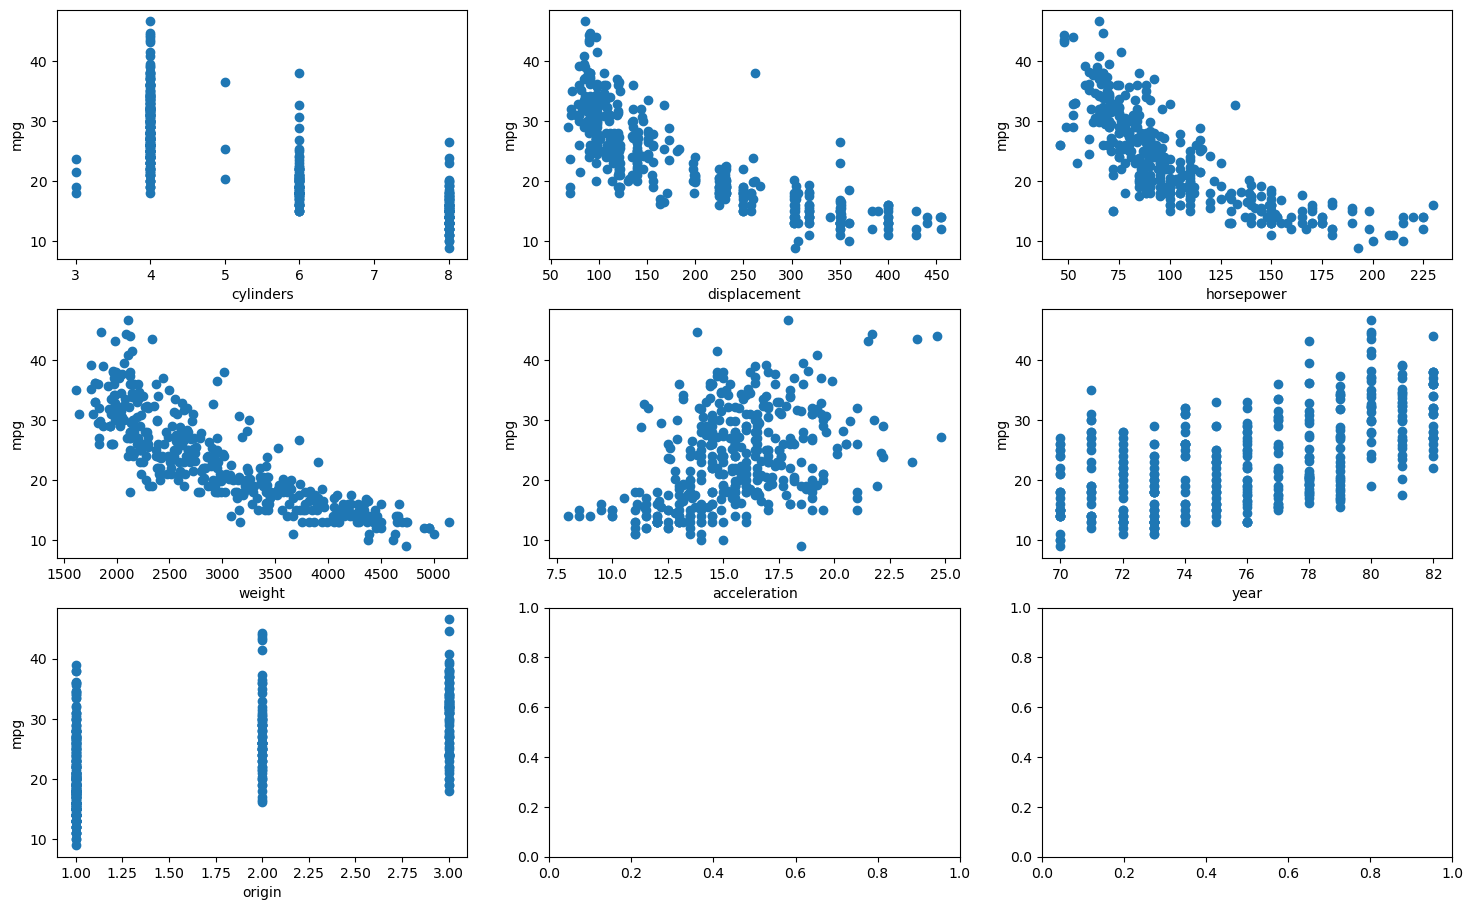

In [21]:
# I created a new array excluding 'mpg' and plotted scatter plots of the relationship between each array column and 'mpg' in a 3x3 layout.

import matplotlib.pyplot as plt


fig, axes = plt.subplots(3,3)

fig.set_size_inches((18,11))

columns_to_plot = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']

for row in range(3):
    for col in range(3):
        
        idx = row*3+ col
        if(idx < len(columns_to_plot)):
            axes[row, col].scatter(quantitative_df[columns_to_plot[idx]], quantitative_df["mpg"])
            axes[row, col].set_xlabel(columns_to_plot[idx])
            axes[row, col].set_ylabel("mpg")
        else :
            pass
         
        
plt.show()